In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/My Drive/AI_Workshops/Dataset/Sandil_Rai_ML_Datasets/Regression

/content/drive/My Drive/AI_Workshops/Dataset/Sandil_Rai_ML_Datasets/Regression


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
df = pd.read_csv('water_potability.csv')

**Data Overview**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
display(df.head(5), df.tail(5))

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.177061,7.509306,NaN,327.459760,16.140368,78.698446,2.309149,1


In [ ]:
# Displaying the dimension of the dataset
print(f"The dimension of the dataset is (r, c): {df.shape}")

The dimension of the dataset is (r, c): (3276, 10)


In [ ]:
column_list = df.columns.tolist()
print(f"The columns of the dataset are: {column_list}.")
df.dtypes

The columns of the dataset are: ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'].


,0
ph,float64
Hardness,float64
Solids,float64
Chloramines,float64
Sulfate,float64
Conductivity,float64
Organic_carbon,float64
Trihalomethanes,float64
Turbidity,float64
Potability,int64


**Visualization of Distribution of Target using Box-plot**

Shows slightly higher number of datapoints for Not Potable (0)

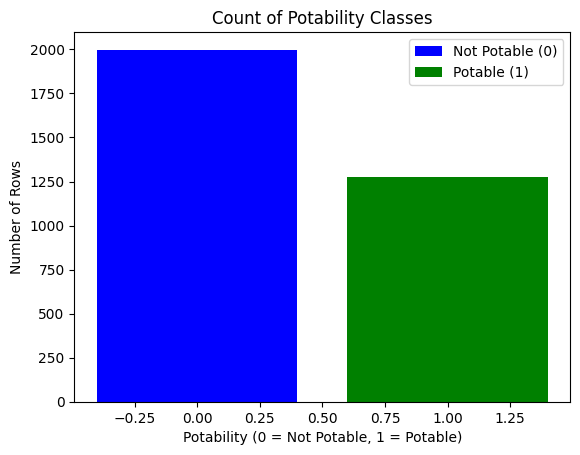

In [ ]:
counts = df['Potability'].value_counts()

# Plot bar chart
plt.bar(counts.index, counts.values, color=['blue', 'green'])

# Add labels
plt.xlabel('Potability (0 = Not Potable, 1 = Potable)')
plt.ylabel('Number of Rows')
plt.title('Count of Potability Classes')
plt.bar(counts.index, counts.values, color=['blue', 'green'], label=['Not Potable (0)', 'Potable (1)'])
plt.legend(loc='upper right')
plt.show()

**Data Cleaning**

In [ ]:
df.isna().sum()

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


Visualization of Features containing Null values

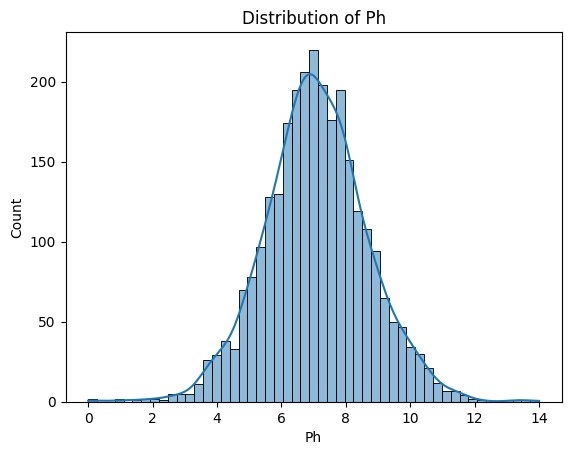

In [ ]:
sns.histplot(data = df['ph'], kde = True)
plt.xlabel('Ph')
plt.ylabel('Count')
plt.title('Distribution of Ph')
plt.show()

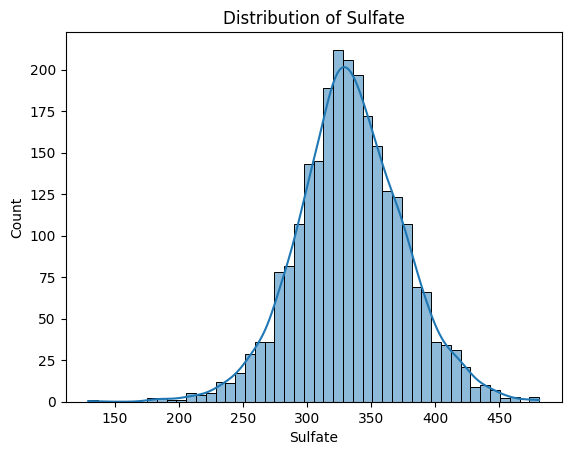

In [ ]:
sns.histplot(data = df['Sulfate'], kde = True)
plt.xlabel('Sulfate')
plt.ylabel('Count')
plt.title('Distribution of Sulfate')
plt.show()

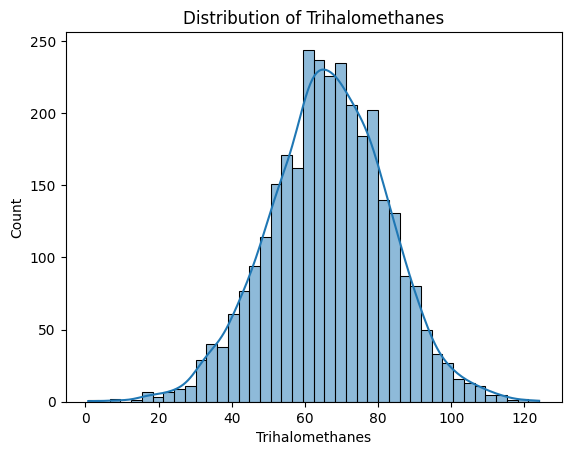

In [ ]:
sns.histplot(data = df['Trihalomethanes'], kde = True)
plt.xlabel('Trihalomethanes')
plt.ylabel('Count')
plt.title('Distribution of Trihalomethanes')
plt.show()

Filling missing values with mean due to symmetrical distribution

In [ ]:
df['ph'] = df['ph'].fillna(df['ph'].mean())
df['Sulfate'] = df['Sulfate'].fillna(df['Sulfate'].mean())
df['Trihalomethanes'] = df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean())

df.isna().sum()

,0
ph,0
Hardness,0
Solids,0
Chloramines,0
Sulfate,0
Conductivity,0
Organic_carbon,0
Trihalomethanes,0
Turbidity,0
Potability,0


In [ ]:
df.duplicated().sum() # Observing possible duplicate rows in the dataframe

0

**Descriptive Statistics**

In [ ]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.469956,32.879761,8768.570828,1.583085,36.142612,80.824064,3.308162,15.769881,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.080795,196.967627,20927.833607,7.130299,333.775777,421.884968,14.218338,66.396293,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


**Outlier Detection via Data Visualization**

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity'],
      dtype='object')

<Figure size 600x500 with 0 Axes>

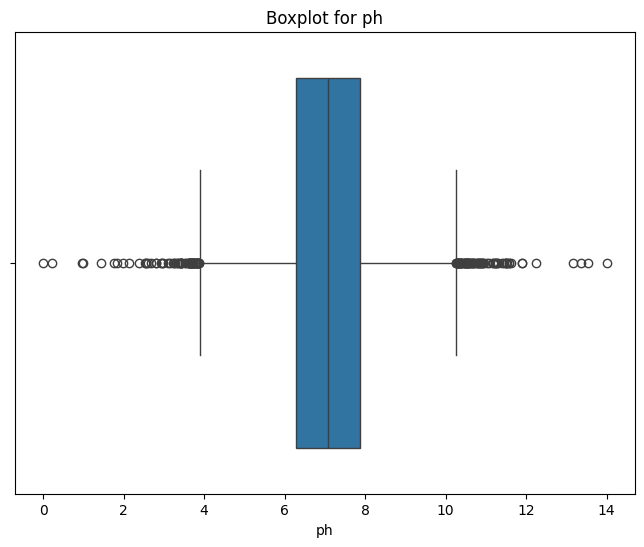

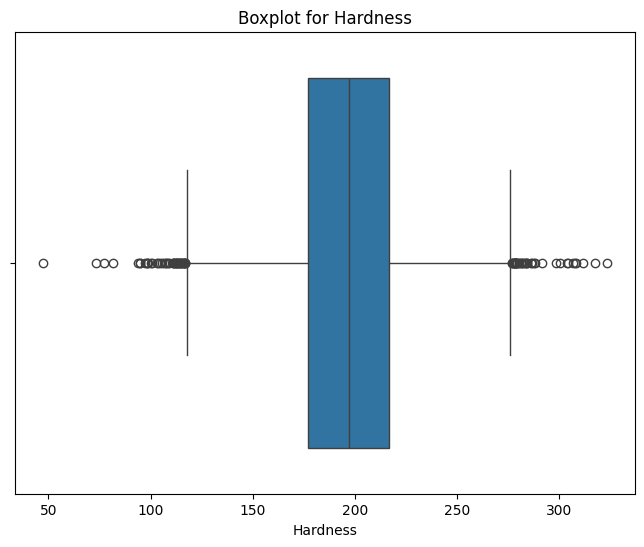

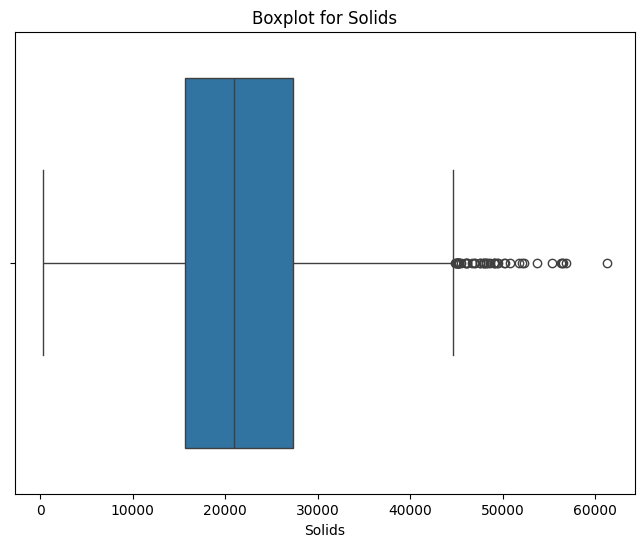

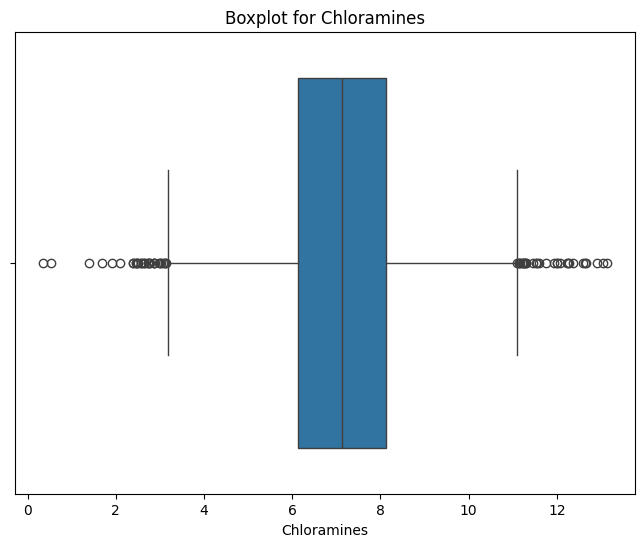

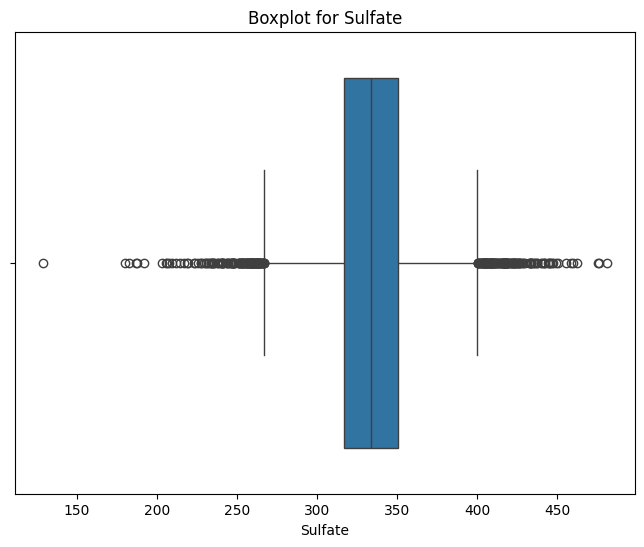

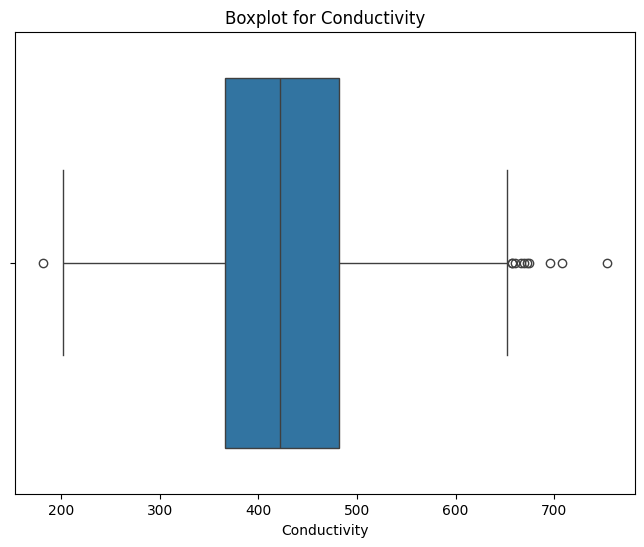

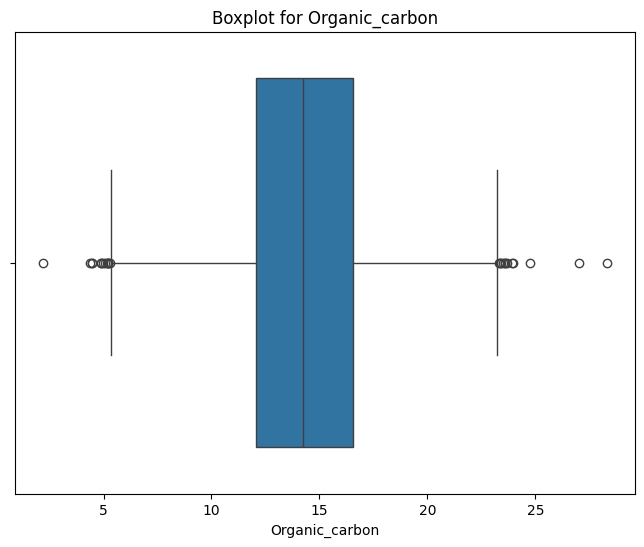

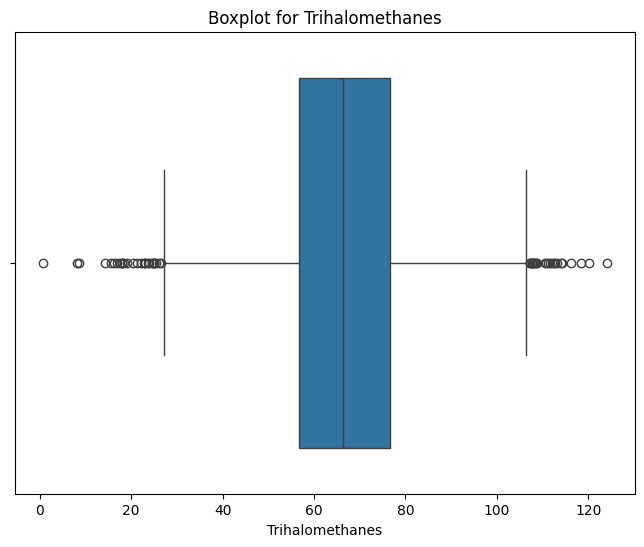

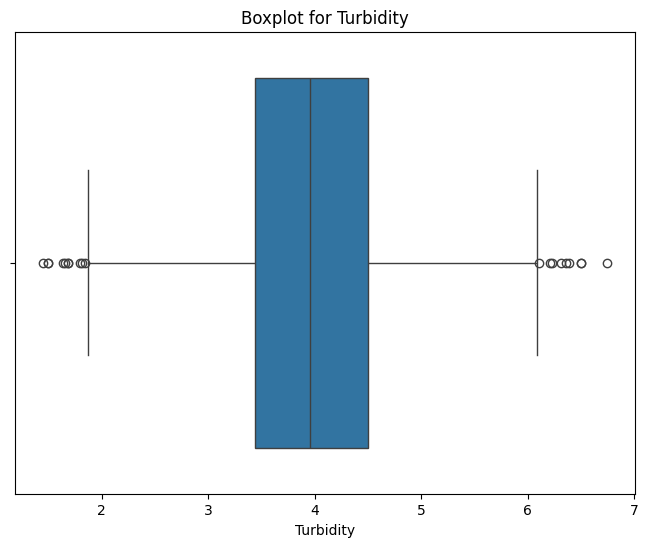

In [ ]:
features = df.drop(columns='Potability').columns
display(features)

plt.figure(figsize=(6, 5))

for feature in features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot for {feature}')
    plt.show()


**Outlier Detection and Handling**

In [ ]:
features = df.columns[:-1]
display(features) # Independent variables

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity'],
      dtype='object')

In [ ]:
outlierInfo = {} # An empty dictionary for storing outliers into (key: independent variable and value: Value of outlier)

for feature in features:
  Q1 = df[feature].quantile(0.25)
  Q3 = df[feature].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR


  # df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]


  outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
  outlierInfo[feature] = outliers.shape[0]

  print(outliers['Potability'].value_counts())

  df[feature] = df[feature].clip(lower=lower_bound, upper=upper_bound)


for feature, outliers in outlierInfo.items():
  print(f"Number of outliers in {feature}: {outliers}")



Potability
0    104
1     38
Name: count, dtype: int64
Potability
1    47
0    36
Name: count, dtype: int64
Potability
0    24
1    23
Name: count, dtype: int64
Potability
1    34
0    27
Name: count, dtype: int64
Potability
1    150
0    114
Name: count, dtype: int64
Potability
0    7
1    4
Name: count, dtype: int64
Potability
0    19
1     6
Name: count, dtype: int64
Potability
0    31
1    23
Name: count, dtype: int64
Potability
1    10
0     9
Name: count, dtype: int64
Number of outliers in ph: 142
Number of outliers in Hardness: 83
Number of outliers in Solids: 47
Number of outliers in Chloramines: 61
Number of outliers in Sulfate: 264
Number of outliers in Conductivity: 11
Number of outliers in Organic_carbon: 25
Number of outliers in Trihalomethanes: 54
Number of outliers in Turbidity: 19


In [ ]:

display(type(outliers))

int

**Data Visualization After Handling missing values, duplicates and Outliers**

For box-plot comparision before and after outlier handling

<Figure size 600x500 with 0 Axes>

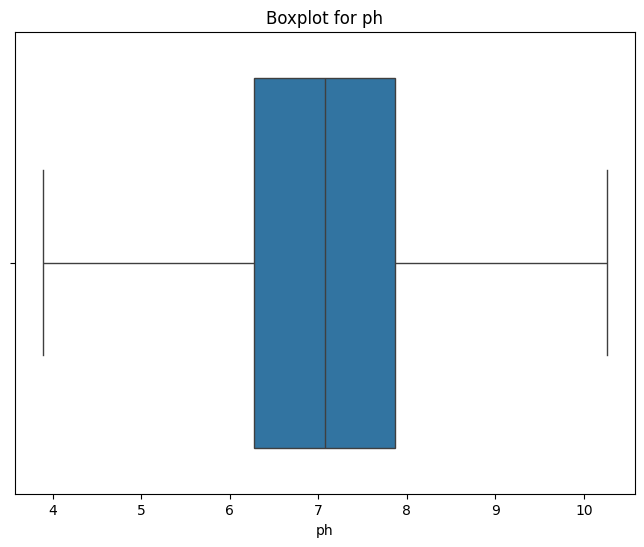

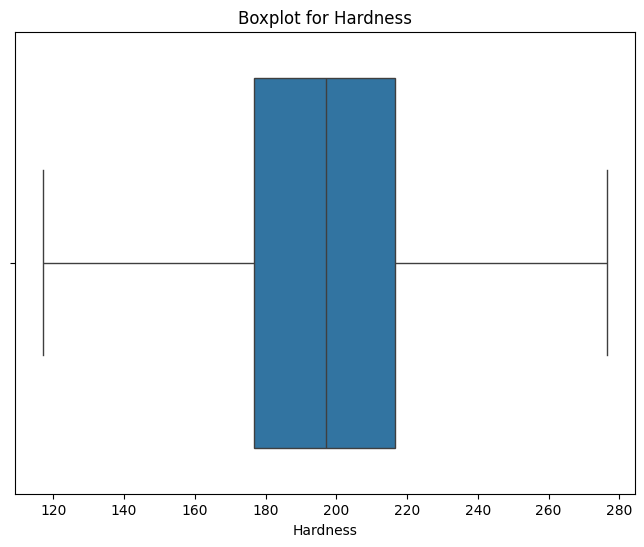

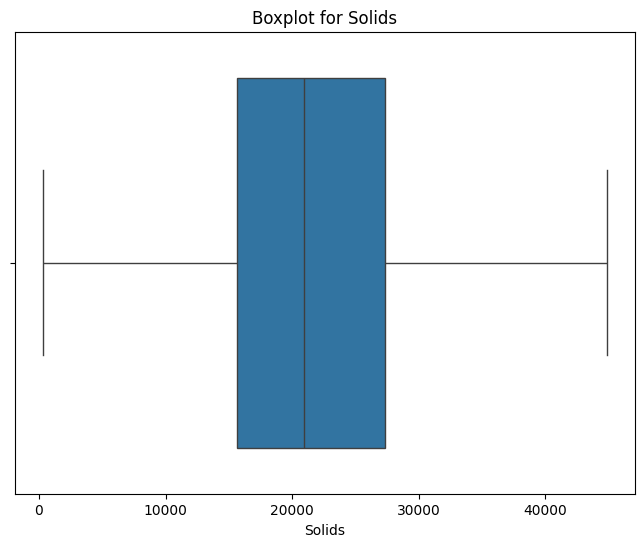

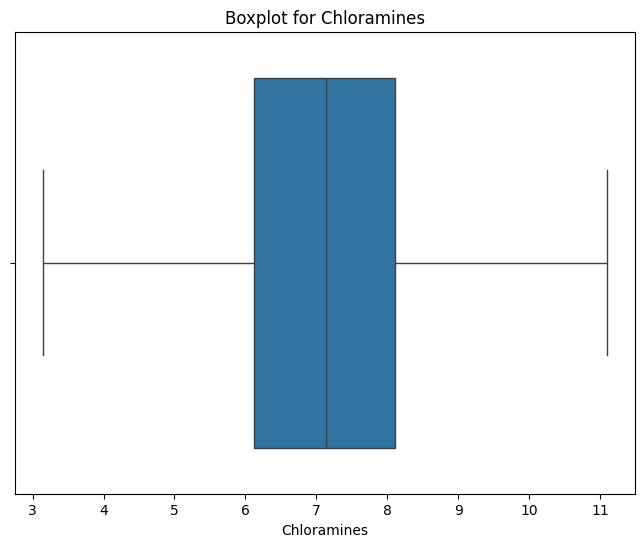

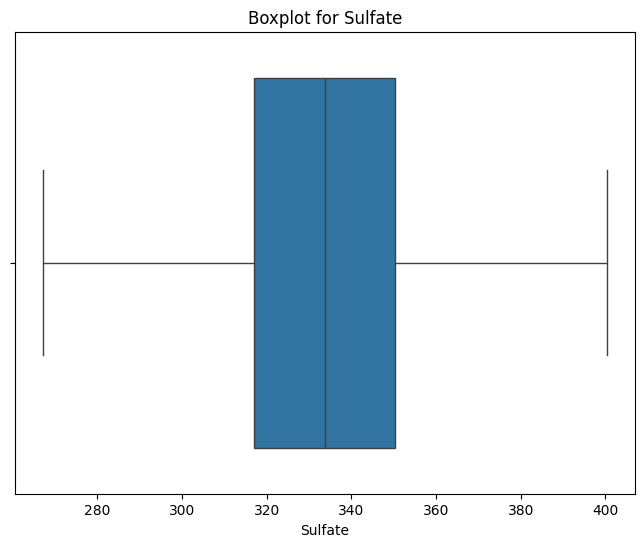

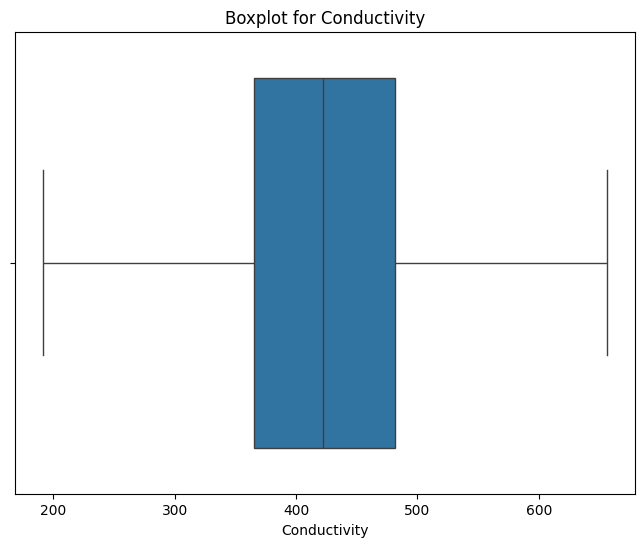

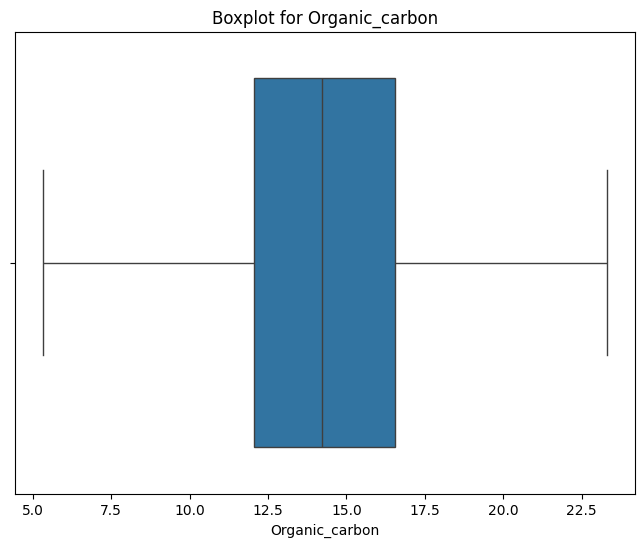

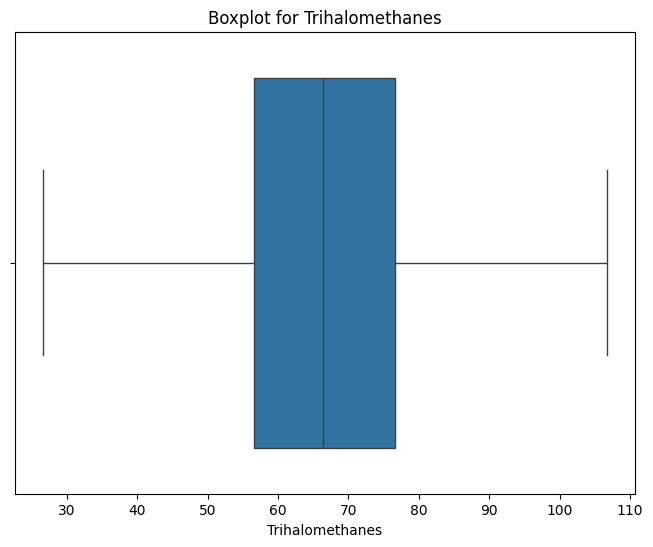

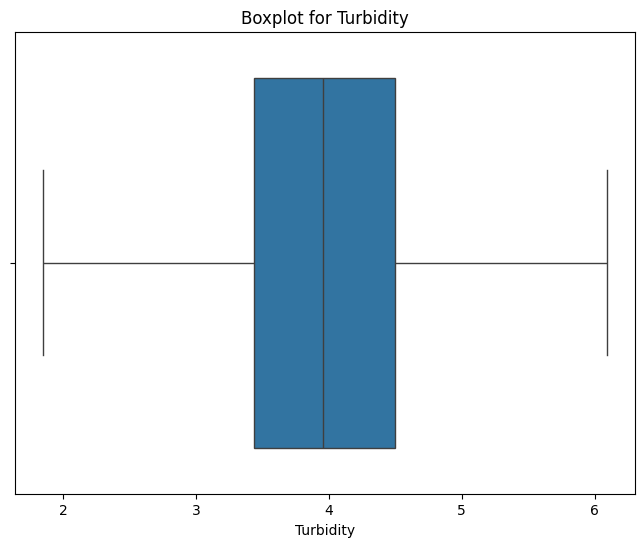

In [ ]:
plt.figure(figsize=(6, 5))

for feature in features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot for {feature}')
    plt.show()

Visualization of Trihalomethanes feature after handling missing values and outliers

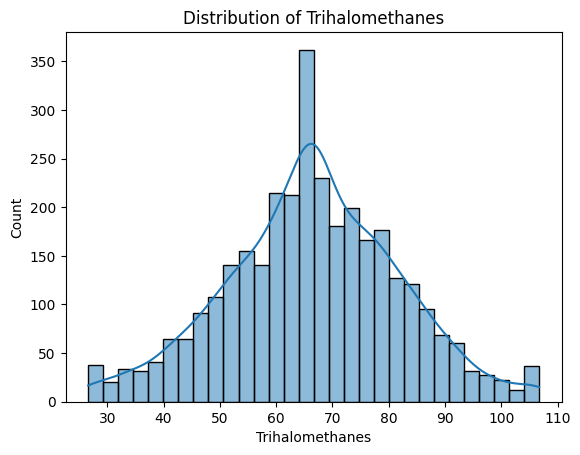

In [ ]:
sns.histplot(data = df['Trihalomethanes'], kde = True)
plt.xlabel('Trihalomethanes')
plt.ylabel('Count')
plt.title('Distribution of Trihalomethanes')
plt.show()

**Evaluating linearity between Features and Target using Scatter plot and Heat map**

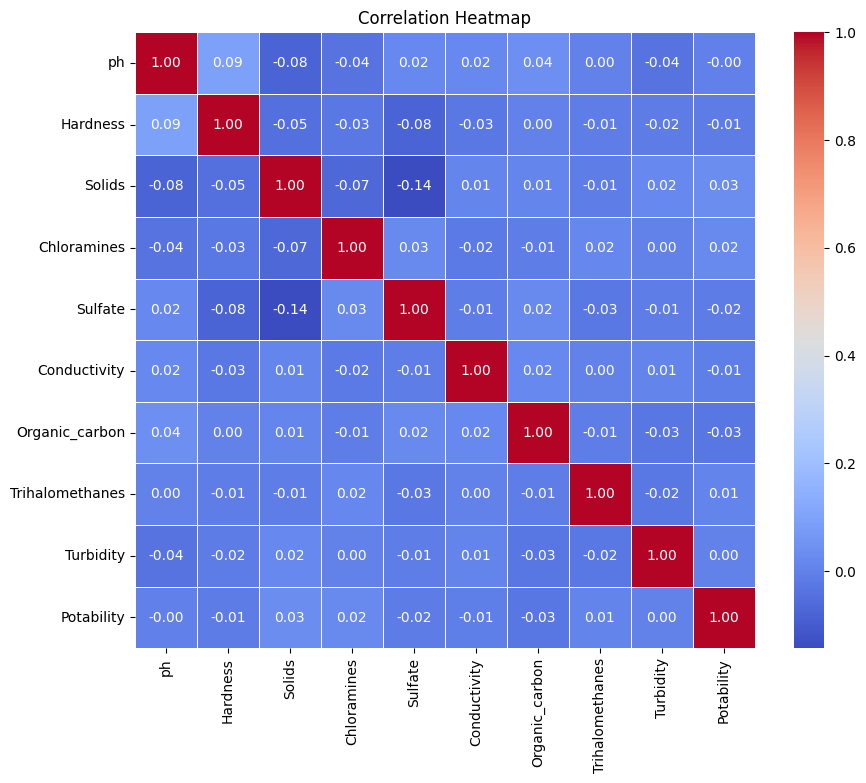

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

**Feature Engineering**

In [ ]:
df['Chloramine_Adjusted'] = df['Chloramines'] / df['Turbidity']
df['Hardness_Conductivity'] = df['Hardness'] * df['Conductivity']
df['pH_Organic_Carbon'] = df['ph'] * df['Organic_carbon']

df.head(5)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,Chloramine_Adjusted,Hardness_Conductivity,pH_Organic_Carbon
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0,2.463678,115621.457180,73.497111
1,3.889107,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0,1.474284,76732.954710,59.036695
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0,3.035368,93866.691376,136.621185
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0,1.741139,77874.676028,153.332258
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0,1.606498,72152.799599,105.090459


**Feature Selection**


**Select K Best - mutual info classifier**

In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
X = df.drop(columns = 'Potability')
y = df['Potability']

kBest = SelectKBest(score_func = mutual_info_classif, k = 6)
kBest.fit(X, y)

SelectKBest(k=6, score_func=<function mutual_info_classif at 0x780adc9091c0>)

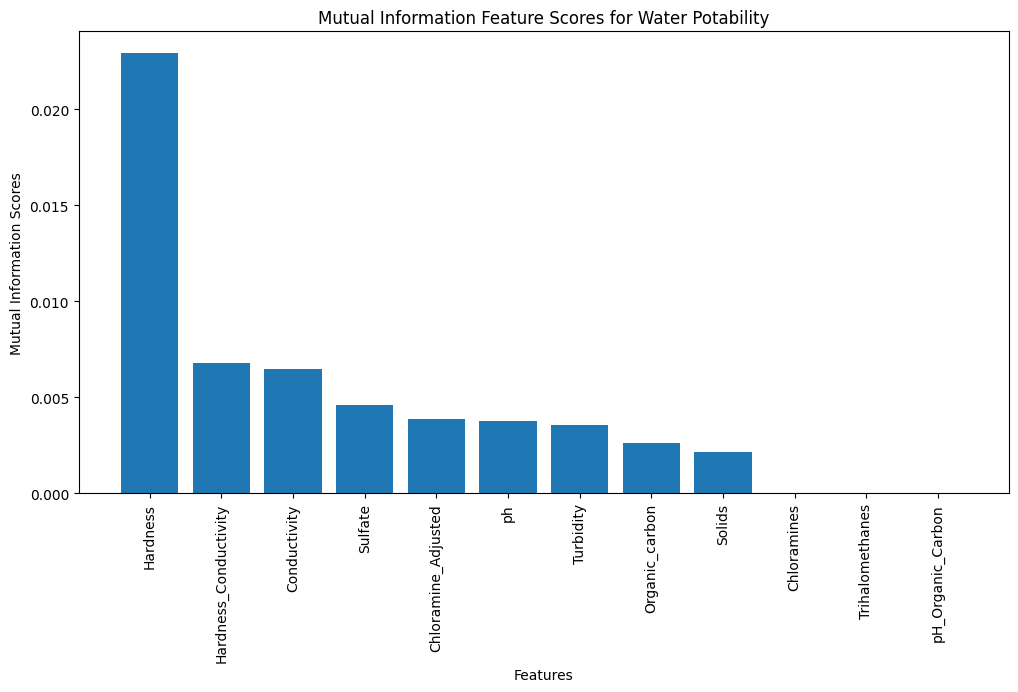

In [ ]:
selectedFeatureIndices = np.where(kBest.get_support())[0]
featuresNames = X.columns[selectedFeatureIndices]
featureScores = kBest.scores_
featureDf = pd.DataFrame({'Feature': X.columns, 'Mutual Information': featureScores})
featureDf = featureDf.sort_values(by = 'Mutual Information', ascending = False)

plt.figure(figsize=(12, 6))
plt.bar(range(len(featureDf)), featureDf['Mutual Information'])
plt.xlabel('Features')
plt.ylabel('Mutual Information Scores')
plt.title('Mutual Information Feature Scores for Water Potability')
plt.xticks(range(len(featureDf)), featureDf['Feature'], rotation=90)
plt.show()

In [ ]:
featureDf.dtypes

,0
Feature,object
Mutual Information,float64


In [ ]:
print(featuresNames)

Index(['ph', 'Hardness', 'Sulfate', 'Conductivity', 'Chloramine_Adjusted',
       'Hardness_Conductivity'],
      dtype='object')


**Logistic Regression Model from scratch**

In [ ]:
selectedDf = df[featuresNames]
target = df['Potability']

selectedDf.head()

,ph,Hardness,Sulfate,Conductivity,Chloramine_Adjusted,Hardness_Conductivity
0,7.080795,204.890455,368.516441,564.308654,2.463678,115621.457180
1,3.889107,129.422921,333.775777,592.885359,1.474284,76732.954710
2,8.099124,224.236259,333.775777,418.606213,3.035368,93866.691376
3,8.316766,214.373394,356.886136,363.266516,1.741139,77874.676028
4,9.092223,181.101509,310.135738,398.410813,1.606498,72152.799599


In [ ]:
x = selectedDf
y = target
display(x.head(5), y.tail(5))

,ph,Hardness,Sulfate,Conductivity,Chloramine_Adjusted,Hardness_Conductivity
0,7.080795,204.890455,368.516441,564.308654,2.463678,115621.457180
1,3.889107,129.422921,333.775777,592.885359,1.474284,76732.954710
2,8.099124,224.236259,333.775777,418.606213,3.035368,93866.691376
3,8.316766,214.373394,356.886136,363.266516,1.741139,77874.676028
4,9.092223,181.101509,310.135738,398.410813,1.606498,72152.799599


,Potability
3271,1
3272,1
3273,1
3274,1
3275,1


Splitting Dataset into Training and Testing Sets

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Scaling the Training and Testing datasets

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
sc_x_train = scaler.fit_transform(x_train)
sc_x_test = scaler.transform(x_test)

Overview of train and test datasets

In [ ]:
print("Training Set - X_train shape:", x_train.shape)
print("Testing Set - X_test shape:", x_test.shape)
print("Training Set - y_train shape:", y_train.shape)
print("Testing Set - y_test shape:", y_test.shape)

Training Set - X_train shape: (2620, 6)
Testing Set - X_test shape: (656, 6)
Training Set - y_train shape: (2620,)
Testing Set - y_test shape: (656,)


In [ ]:
y_test.value_counts()

,count
Potability,
0,412
1,244


**Logistic Regression From Scratch**

In [ ]:
import random

# function for initializing parameters based on the shape of features (for weights)
def initialize_parameters(d):
  b = random.random()
  w = np.random.rand(d)
  return b, w

In [ ]:
# Initializing features randomly

b, w = initialize_parameters(sc_x_train.shape[1])
b, w

(0.1999753020096302,
 array([0.93657065, 0.24933344, 0.65753396, 0.38407762, 0.10624461,
        0.42998087]))

In [ ]:
# Logistic Function
def logistic_function(b, w, sc_x_train):
  z = b + np.dot(sc_x_train, w)
  return 1 /(1 + np.exp(-z))

y_hat = logistic_function(b,w,sc_x_train)
y_hat[0:5]

array([0.36141594, 0.69726694, 0.48829083, 0.59326372, 0.31214512])

In [ ]:
# Define cost function with L2 regularization
def cost_function(y_train, y_hat, w, lambda_):
  m = len(y_train)
  cost = -np.sum(np.dot(y_train, np.log(y_hat)) + np.dot((1 - y_train), np.log(1 - y_hat))) / m + (lambda_ / (2*m))*np.sum(w**2)
  return cost

In [ ]:
# update parameters
def update_parameters(y_train, y_hat, sc_X_train, b0, w0, alpha, lambda_):
  m = len(y_train)
  dw = np.dot(sc_X_train.T, (y_hat - y_train)) / m
  db = np.sum(y_hat - y_train) / m
  w0 = w0 - alpha * (dw + (lambda_ / m) * w0)
  b0 = b0 - alpha * db
  return b0,w0

In [ ]:
def gradient_descent(sc_x_train, y_train, n_iter=500, alpha=0.01, lambda_=0.1):
    b, w = initialize_parameters(sc_x_train.shape[1])  # Initialize parameters
    cost_fun = []

    for i in range(n_iter):
        y_hat = logistic_function(b, w, sc_x_train)
        cost_now = cost_function(y_train, y_hat, w, lambda_)
        b, w = update_parameters(y_train, y_hat, sc_x_train, b, w, alpha, lambda_)
        cost_fun.append(cost_now)

    return b, w, cost_fun

b, w, cost_fun = gradient_descent(sc_x_train, y_train, n_iter=2000, alpha=0.01, lambda_=0.001)

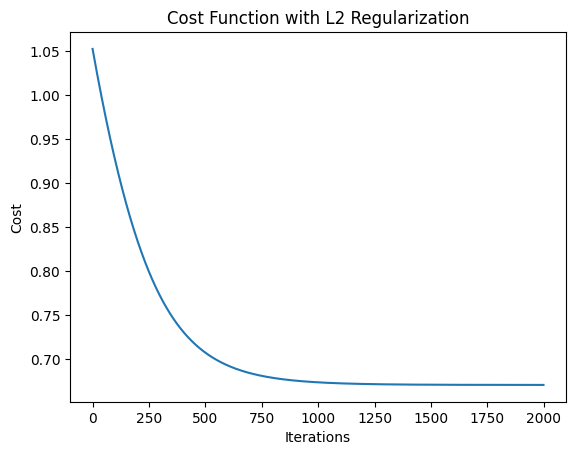

In [ ]:
# Visualizing the cost function

import matplotlib.pyplot as plt
plt.plot(cost_fun)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function with L2 Regularization')
plt.show()

Hypertuning adjustment for Logistic Regression Model from Scratch

**Visualization of Cost Function**

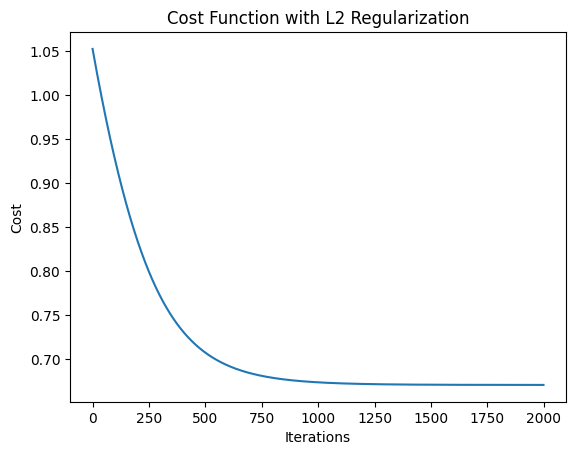

In [ ]:
# Visualizing the cost function

import matplotlib.pyplot as plt
plt.plot(cost_fun)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function with L2 Regularization')
plt.show()

**Evaluations Metrics: Logistic Regression**

**AUC-ROC Visualization: Logistic Regression**

In [ ]:
from sklearn.metrics import roc_curve,accuracy_score,auc

y_hat_test = logistic_function(b, w, sc_x_test)
fpr, tpr, _ = roc_curve(y_test,y_hat_test) # False Positive Rate, True Positive Rate and thresholds are returned to ftr, ptr and _ respectively

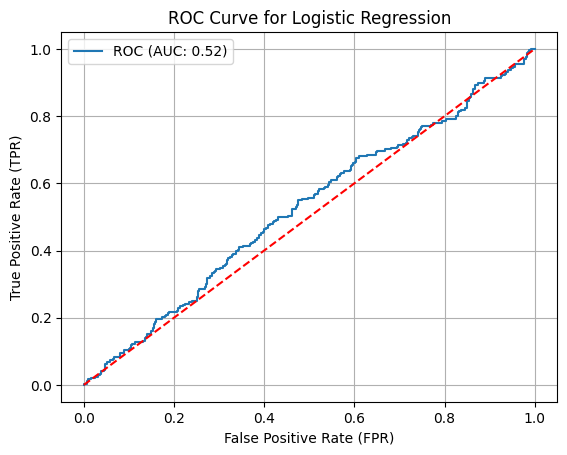

In [ ]:
roc_auc = auc(fpr,tpr)

plt.plot(fpr,tpr,label=f'ROC (AUC: {roc_auc:.2f})')
plt.plot([0,1],[0,1],color='r',linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Logistic Regression')
plt.legend()
plt.grid()
plt.show()

Prediction of potable water using logistic function if values returned by the function is greater than 0.5

In [ ]:
y_predict = (y_hat_test >= 0.5).astype(int) # y_hat_test contains the values / probabilities returned from logistic function / sigmoid function and probabilites above 0.5 are considered as potable water (1)
accuracy_score(y_test,y_predict)

0.6280487804878049

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, roc_auc_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("F1 Score: {:.4f}".format(f1))
print("Precision: {:.4f}".format(precision_score(y_test, y_predict)))
print("Recall: {:.4f}".format(recall_score(y_test, y_predict)))
print("ROC AUC Score: {:.4f}".format(roc_auc_score(y_test, y_predict)))

Accuracy: 62.80%
F1 Score: 0.0000
Precision: 0.0000
Recall: 0.0000
ROC AUC Score: 0.5000


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Classification Report: Logistic Regression**

In [ ]:
# evaluate the model
confusionMatLogistic =  confusion_matrix(y_test, y_predict)
print("\nClassification Report:\n", classification_report(y_test, y_predict))


Classification Report:
               precision    recall  f1-score   support

           0       0.63      1.00      0.77       412
           1       0.00      0.00      0.00       244

    accuracy                           0.63       656
   macro avg       0.31      0.50      0.39       656
weighted avg       0.39      0.63      0.48       656



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Heat Map Visualization: Logistic Regression **

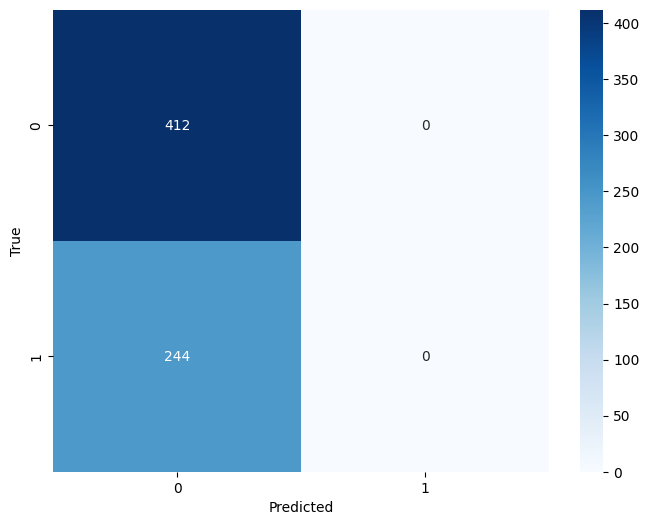

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusionMatLogistic, annot = True, fmt = 'd', cmap = 'Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
# display(selectedDf)

Logistic Regression Using sklrean library

In [ ]:
from sklearn.linear_model import LogisticRegression

logistic_reg_model = LogisticRegression(penalty='l2') # uses ridge regularization
logistic_reg_model.fit(sc_x_train, y_train)
y_pred = logistic_reg_model.predict(sc_x_test)

# Calculating the accuracy
accuracy = accuracy_score(y_test, y_pred)
train_accuracy = accuracy_score(y_train, logistic_reg_model.predict(sc_x_train))
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Testing Accuracy: {accuracy * 100:.2f}%")


Training Accuracy: 60.53%
Testing Accuracy: 62.80%


**Using Decision Tree Model for Classification Task using sklearn library**

Creating a decision tree model using sklearn library

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

decisionTreeClassifier = DecisionTreeClassifier(random_state = 42)

fitting values to the decision tree model

In [ ]:
decisionTreeClassifier.fit(sc_x_train, y_train) # fitting the normalized x_train and y_train in the model

DecisionTreeClassifier(random_state=42)

Accuracy while training and testing the model

In [ ]:
train_acc = accuracy_score(y_train, decisionTreeClassifier.predict(sc_x_train))
test_acc = accuracy_score(y_test, decisionTreeClassifier.predict(sc_x_test))

Displaying the accuracy of the model

In [ ]:
print(f"Training Accuracy: {train_acc * 100:.2f}")
print(f"Test Accuracy: {test_acc * 100:.2f}")

Training Accuracy: 100.00
Test Accuracy: 57.47


Using Synthetic Minority Over-Sampling (SMOTE) method to generate more classes of minority class (i.e. 1)

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(sc_x_train, y_train)

New number of datasets of test sets

In [ ]:
print("Number of samples in X_resampled:", len(X_resampled))
print("Number of samples in y_resampled:", len(y_resampled))

Number of samples in X_resampled: 3172
Number of samples in y_resampled: 3172


In [ ]:
# Handling overfitting by using Hyperparameter tuning to identify best hyperparameters
from sklearn.model_selection import GridSearchCV

# Define a range of hyperparameters to test
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}


In [ ]:
# Performing GridSearchCV with cross-validation
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_resampled, y_resampled)

# Printing best parameters
print("Best Hyperparameters: ", grid_search.best_params_)

final_decision_tree = grid_search.best_estimator_

Best Hyperparameters:  {'max_depth': 7, 'min_samples_leaf': 5, 'min_samples_split': 2}


**Evaluation metrics of the model**

**Accuracy metric**

In [ ]:
train_accuracy = accuracy_score(y_train, final_decision_tree.predict(sc_x_train))
test_accuracy = accuracy_score(y_test, final_decision_tree.predict(sc_x_test))

In [ ]:
print(f"Training Accuracy: {train_accuracy * 100:.2f}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}")

Training Accuracy: 68.44
Test Accuracy: 61.59


**Area Under Curve - Receiver-Operating Charactersitic Curve (AUC-ROC): Decision Tree**

In [ ]:
# Get the predicted probabilities for the positive class (Potable = 1)
y_test_probs = final_decision_tree.predict_proba(sc_x_test)[:, 1]  # Probability for class 1

# Compute the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_test_probs)
roc_auc = auc(fpr, tpr)

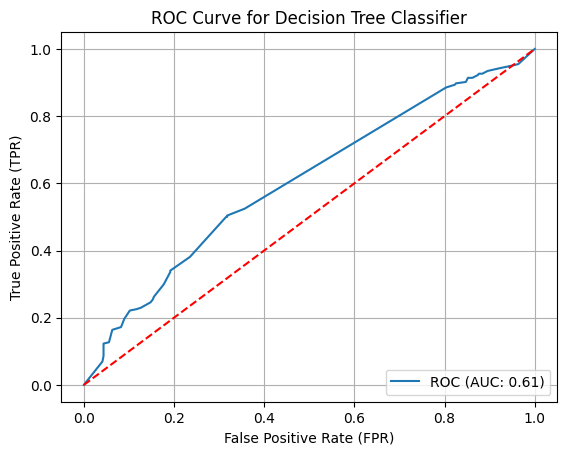

In [ ]:
plt.plot(fpr,tpr,label=f'ROC (AUC: {roc_auc:.2f})')
plt.plot([0,1],[0,1],color='r',linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Decision Tree Classifier')
plt.legend(loc='lower right')
plt.grid()
plt.show()

**Classification Report: Decision Tree Model**

In [ ]:
print(classification_report(y_test, final_decision_tree.predict(sc_x_test)))

              precision    recall  f1-score   support

           0       0.70      0.68      0.69       412
           1       0.48      0.50      0.49       244

    accuracy                           0.62       656
   macro avg       0.59      0.59      0.59       656
weighted avg       0.62      0.62      0.62       656



**Confusion Matrix Visualization: Decision Tree Model**

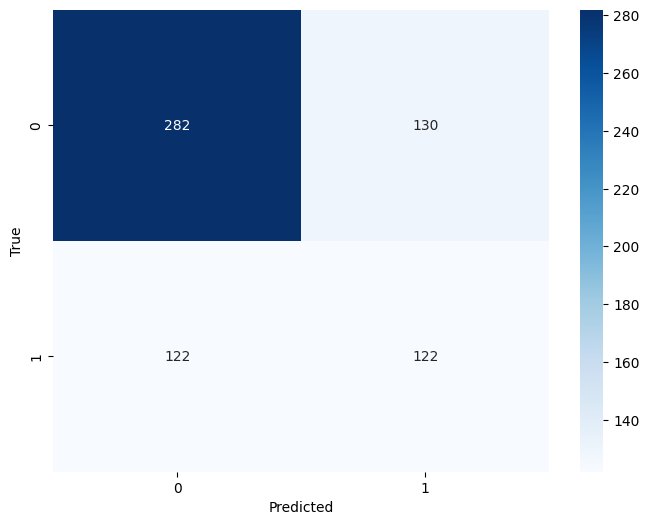

In [ ]:
cm = confusion_matrix(y_test, final_decision_tree.predict(sc_x_test))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

**Random Forest Classification Using Scikit-Learn Library**

Using Random Forest Classifier Model and Fitting the model with train values

In [ ]:
from sklearn.ensemble import RandomForestClassifier

randomForestModel = RandomForestClassifier(
    n_estimators = 100,
    max_depth = 10,
    min_samples_split = 10,
    min_samples_leaf = 5,
    random_state = 42
)

randomForestModel.fit(X_resampled, y_resampled)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

In [ ]:
y_test_pred = randomForestModel.predict(sc_x_test)
train_pred = randomForestModel.predict(X_resampled)

**Evaluation Metrics: Random Forest Model**

**Accuracy Metric: Random Forest Model**

In [ ]:
accuracy_train = accuracy_score(y_resampled, train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

print(f"Accuracy on training set: {accuracy_train * 100:.2f}")
print(f"Accuracy on test set: {accuracy_test * 100:.2f}")

Accuracy on training set: 82.28
Accuracy on test set: 64.94


**Classification Report: Random Forest Model**

In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.71      0.74      0.73       412
           1       0.53      0.49      0.51       244

    accuracy                           0.65       656
   macro avg       0.62      0.62      0.62       656
weighted avg       0.64      0.65      0.65       656



**Confusion Matrix Visualization: Random Forest Model Before Hyper-parameter Tuning**

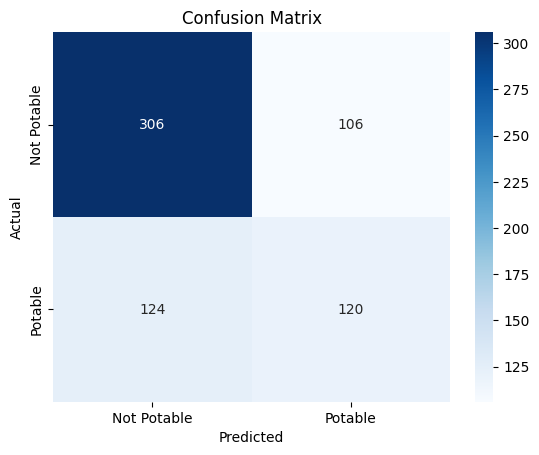

In [ ]:
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=['Not Potable', 'Potable'], yticklabels=['Not Potable', 'Potable'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
y_probs = randomForestModel.predict_proba(sc_x_test)[:, 1]  # Get probability of positive class
roc_auc = roc_auc_score(y_test, y_probs)

print(f"ROC-AUC Score: {roc_auc:.2f}")

ROC-AUC Score: 0.67


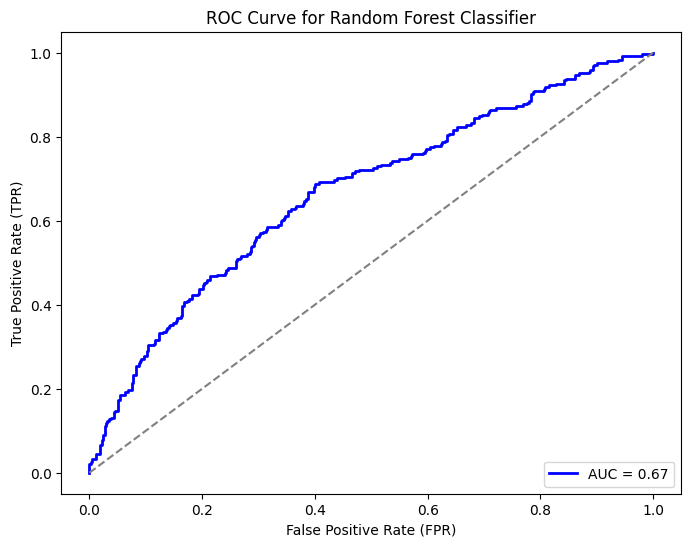

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)  # Compute AUC score

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random model)

# Labels & Title
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Random Forest Classifier')
plt.legend(loc='lower right')

# Show the plot
plt.show()

**Hyper-parameter Tuning: Random Forest Model**

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_resampled, y_resampled)

best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Predict with the best model
y_test_pred = best_model.predict(sc_x_test)
print("Optimized Accuracy:", accuracy_score(y_test, y_test_pred))


Best Parameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Optimized Accuracy: 0.6478658536585366


In [ ]:
y_test_pred = best_model.predict(sc_x_test)

In [ ]:
accuracy_train = accuracy_score(y_resampled, train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

print(f"Accuracy on training set: {accuracy_train * 100:.2f}")
print(f"Accuracy on test set: {accuracy_test * 100:.2f}")

Accuracy on training set: 82.28
Accuracy on test set: 64.79


In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.71      0.74      0.73       412
           1       0.53      0.49      0.51       244

    accuracy                           0.65       656
   macro avg       0.62      0.62      0.62       656
weighted avg       0.64      0.65      0.65       656



**AUC-ROC Curve Visualization: Random Forest Model After Hyper-parameter Tuning**

In [ ]:
y_probs = best_model.predict_proba(sc_x_test)[:, 1]  # Get probability of positive class
roc_auc = roc_auc_score(y_test, y_probs)

print(f"ROC-AUC Score: {roc_auc:.2f}")

ROC-AUC Score: 0.67


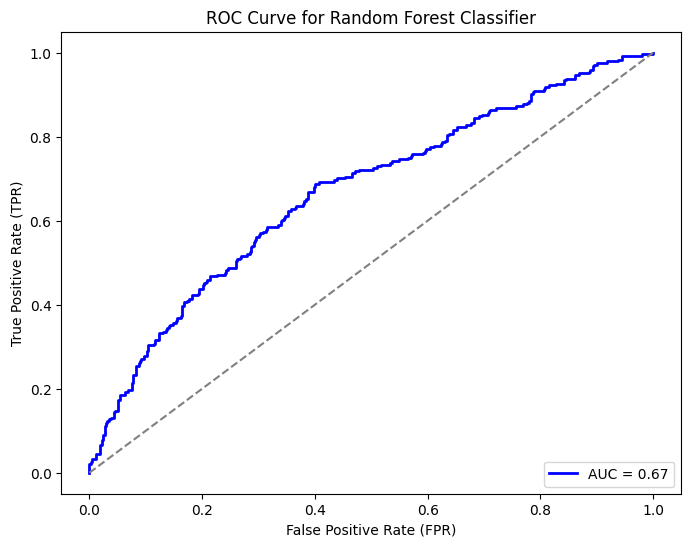

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)  # Compute AUC score

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random model)

# Labels & Title
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Random Forest Classifier')
plt.legend(loc='lower right')

# Show the plot
plt.show()

**Confusion Matrix Visualization: Random Forest Model After Hyper-parameter tuning**

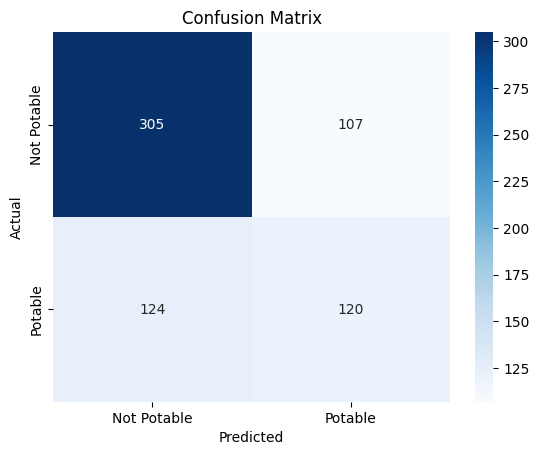

In [ ]:
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=['Not Potable', 'Potable'], yticklabels=['Not Potable', 'Potable'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()